# **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/models
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models
ann_backdoors.pkl   bagging_svr.pkl	 knn_reconnaissance.pkl
ann_dos.pkl	    best_logr.pkl	 knn_worms.pkl
ann_online_2nd.pkl  creme_lr_online.pkl  par_online.pkl
ann_online.pkl	    ens_logr.pkl	 RandomForrest_Analysis.pkl
ann_shellcode.pkl   knn_exploits.pkl	 RandomForrest_Fuzzer.pkl
bagging_lr.pkl	    knn_generic.pkl	 SGD_online.pkl


# **Load attackwise best ML models**

In [ ]:
from joblib import Parallel, delayed
import joblib

%cd /content/drive/MyDrive/FYP/Implementation/models

ann_backdoors = joblib.load('ann_backdoors.pkl')
ann_dos = joblib.load('ann_dos.pkl')
ann_shellcode = joblib.load('ann_shellcode.pkl')
knn_exploits = joblib.load('knn_exploits.pkl')
knn_generic = joblib.load('knn_generic.pkl')
knn_reconnaissance = joblib.load('knn_reconnaissance.pkl')
knn_worms = joblib.load('knn_worms.pkl')
RandomForrest_Analysis = joblib.load('RandomForrest_Analysis.pkl')
RandomForrest_Fuzzer = joblib.load('RandomForrest_Fuzzer.pkl')

models = [RandomForrest_Analysis, ann_backdoors, ann_dos, knn_exploits, RandomForrest_Fuzzer, knn_generic, knn_reconnaissance, ann_shellcode, knn_worms]

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models


In [ ]:
%cd ../data
! ls

[Errno 2] No such file or directory: '../data'
/content
drive  sample_data


## **Load training dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

attack_types = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']

#get selected columns for training
%cd /content/drive/MyDrive/FYP/Implementation/data
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns = set(['Label'])
for attack_type in attack_types:
  tmp = set(select_col[attack_type])
  columns = columns.union(tmp)

#create training dataset 
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
df = df[columns]
df

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


,ct_dst_sport_ltm,ct_srv_src,tcprtt,swin,state,dur,ackdat,sttl,proto,ct_dst_ltm,...,sport,ct_state_ttl,srcip,dstip,dsport,Sload,dttl,dmeansz,ct_src_ ltm,Spkts
0,1,4,0.000000,0,2,0.001089,0.000000,31,120,7,...,272150,0,34,20,83,5.362718e+05,29,89,1,2
1,2,2,0.000000,0,2,0.001036,0.000000,31,120,3,...,357895,0,36,23,83,5.637066e+05,29,89,4,2
2,1,1,0.000656,255,5,0.988841,0.000131,31,114,3,...,88400,0,41,27,34,1.961003e+05,29,125,8,230
3,18,35,0.000000,0,6,0.000003,0.000000,60,120,18,...,4163,0,10,28,83,3.520000e+08,0,0,18,2
4,1,12,0.000722,255,5,0.004009,0.000137,31,114,3,...,292919,0,34,8,20880,1.947618e+06,29,188,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524019,23,23,0.000000,0,6,0.000009,0.000000,60,120,23,...,4163,0,14,29,83,1.173333e+08,0,0,23,2
1524020,1,6,0.000801,255,5,0.426193,0.000176,31,114,3,...,13096,0,34,8,20880,3.680961e+04,29,103,1,22
1524021,1,2,0.133565,255,5,0.667889,0.066741,254,114,1,...,344704,1,31,19,1093,1.161870e+04,252,96,1,12
1524022,1,6,0.000797,255,5,0.041776,0.000256,31,114,4,...,5636,0,41,8,144648,6.206434e+05,29,664,2,54


# **create Test set**

In [ ]:
import pandas as pd
import numpy as np

%cd /content/drive/MyDrive/FYP/Implementation/data
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
test_data = test_data[columns]


test_data = test_data.replace('-','')
test_data = test_data.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in test_data.columns.values.tolist():
  i = test_data.loc[test_data[i].isnull()].index
  test_data = test_data.drop(index=list(i))


#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in test_data:
    test_data['sport'] = test_data['sport'].astype(str).apply(int, base=16)
if 'dsport' in test_data:
    test_data['dsport'] = test_data['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in test_data:
    test_data['srcip'] = labelencoder.fit_transform(test_data['srcip'])
if 'dstip' in test_data:
    test_data['dstip'] = labelencoder.fit_transform(test_data['dstip'])
if 'proto' in test_data:
    test_data['proto'] = labelencoder.fit_transform(test_data['proto'])
if 'state' in test_data:
    test_data['state'] = labelencoder.fit_transform(test_data['state'])

metrics = []
for attack_type in attack_types:
  feature_name = f'{attack_type}_metric'
  metrics.append(feature_name)

i = 0
test_high_level_features = pd.DataFrame()

for model in models:
  columns = select_col[attack_types[i]]
  input = test_data
  data = input[columns].values
  try:
    if i in [1, 2, 7]:
      y_predict_all = model.predict_proba(data)
      y_predict = y_predict_all[:, 1]
    else:
      y_predict = model.predict(data)
    test_high_level_features[metrics[i]] = y_predict
  except Exception as e:
    print(f'{attack_types[i]}, i: {i}, error: {e}\n')
  i = i + 1

test_high_level_features['Label'] = test_data['Label']
test_high_level_features.to_csv("test_high_level_features.csv", header=True, index=False)
test_high_level_features

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Create High level features**

In [ ]:
import numpy as np
metrics = []
for attack_type in attack_types:
  feature_name = f'{attack_type}_metric'
  metrics.append(feature_name)

i = 0
high_level_features = pd.DataFrame()
for model in models:

  columns = select_col[attack_types[i]]
  input = df
  data = input[columns]
  try:
    if i in [1, 2, 7]:
      data = np.array(data)
      y_predict_all = model.predict_proba(data)
      y_predict = y_predict_all[:, 1]
    else:
      y_predict = model.predict(data)
    high_level_features[metrics[i]] = y_predict
  except Exception as e:
    print(f'{attack_types[i]}, i: {i}, error: {e}\n')
  i = i + 1
high_level_features
high_level_features.to_csv("high_level_features.csv", header=True, index=False)

In [ ]:
%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
high_level_features['Label'] = df['Label']
high_level_features
high_level_features.to_csv("high_level_features.csv", header=True, index=False)

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


##**SGD Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
x= np.array(high_level_features.drop(labels=['Label'], axis=1))
y = np.array(high_level_features['Label'])
print(x.shape,y.shape)

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x, y)

# Save the model as a pickle in a file
%cd /content/drive/MyDrive/FYP/Implementation/models
joblib.dump(reg, 'SGD_online.pkl')


/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
(1524024, 9) (1524024,)
/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models


['SGD_online.pkl']

## **Computing optimal threshold**

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models
maximum_train_f1_score: 0.9409592329763731, accuracy: 0.9846216332551193, optimal_threshold:  0.620000


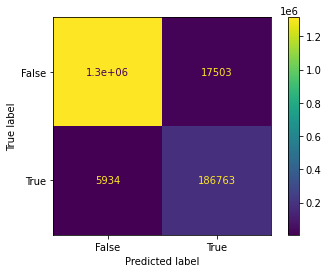

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

%cd /content/drive/MyDrive/FYP/Implementation/models
# Load the model from the file
logr = joblib.load('SGD_online.pkl')

#getting probabilities of class 1
# prob=logr.predict_proba(x)
# prob=prob[:,1]

prob=logr.predict(x)

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]
  f1 = f1_score(y, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y, opt_y_train)
print(f"maximum_train_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# **Test Set Results**

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models
maximum_test_f1_score: 0.5474824298883164, accuracy: 0.8812395916583663, optimal_threshold:  0.600000


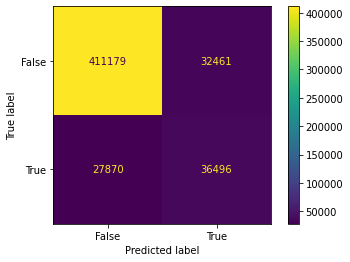

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib


%cd /content/drive/MyDrive/FYP/Implementation/data
test_high_level_features=pd.read_csv("test_high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)

test_high_level_features.dropna()

#delete raws with missing values
for i in test_high_level_features.columns.values.tolist():
  i = test_high_level_features.loc[test_high_level_features[i].isnull()].index
  test_high_level_features = test_high_level_features.drop(index=list(i))

x_test= np.array(test_high_level_features.drop(labels=['Label'], axis=1))
y_test = np.array(test_high_level_features['Label'])


%cd /content/drive/MyDrive/FYP/Implementation/models
# Load the model from the file
logr = joblib.load('SGD_online.pkl')

#getting probabilities of class 1
# prob=logr.predict_proba(x_test)
# prob=prob[:,1]
prob=logr.predict(x_test)
optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]
  f1 = f1_score(y_test, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y_test, opt_y_train)
print(f"maximum_test_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [2]:
!pip uninstall numpy
!pip install numpy==1.23.4
!pip install river

Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.21.6.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>

In [6]:
from river import linear_model
import pandas as pd
from river import compose
from river import metrics
from river import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from joblib import Parallel, delayed
import joblib
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
test_high_level_features=pd.read_csv("test_high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
OTset_high_level_features=pd.read_csv("OTset_high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)

all_data = pd.concat([high_level_features, test_high_level_features, OTset_high_level_features], axis=0)
all_data.dropna()

#delete raws with missing values
for i in all_data.columns.values.tolist():
  i = all_data.loc[all_data[i].isnull()].index
  all_data = all_data.drop(index=list(i))

print(type(all_data))
all_data = shuffle(all_data)
all_data.reset_index(inplace=True, drop=True)

x = np.array(all_data.drop(labels=['Label'], axis=1))
y =  np.array(all_data['Label'])
print(x.shape,y.shape)

model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
metric_accuracy = metrics.Accuracy()
metric_F1 = metrics.F1()
cm = metrics.ConfusionMatrix()

stats_f1 = list()
stats_accuracy = list()

for index, row in all_data.iterrows():
    x_current = row[:-1]
    y_current = row[-1]
    y_pred = model.predict_one(x_current)      # make a prediction
    # y_pred_array.append(y_pred)
    metric_accuracy = metric_accuracy.update(y_current, y_pred)  # update the metric
    metric_F1 = metric_F1.update(y_current, y_pred)  # update the metric
    stats_f1.append(metric_F1.get())
    stats_accuracy.append(metric_accuracy.get())
    model = model.learn_one(x_current, y_current)      # make the model learn
   
    # print(metric_accuracy)
    # print(metric_F1)

# confusion_matrix = confusion_matrix(all_data.iloc[:,-1],  y_pred_array)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show() 



%cd /content/drive/MyDrive/FYP/Implementation/data
stat_df=pd.read_csv('OT_Results.csv', sep=',', on_bad_lines='skip', index_col=False)
stat_df['SGD_F1_score'] = stats_f1
stat_df['SGD_Accuracy'] = stats_accuracy
stat_df.to_csv("OT_Results.csv", header=True, index=False)

# print(stats_f1)
# print(stats_accuracy)

# Save the model as a pickle in a file
%cd /content/drive/MyDrive/FYP/Implementation/models
joblib.dump(model, 'SGD_online_1.pkl')


/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
<class 'pandas.core.frame.DataFrame'>
(2540023, 9) (2540023,)


AttributeError: ignored